In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Target list generation

In [2]:
data_phen = pd.read_csv('data/phenotypes.tsv', sep='\t')
data_phen.head()

,sample,2015,2016,2017,2019,2020,2021,2022,2023
0,PS000196,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN
1,PS000195,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN
2,PS000121,NaN,NaN,101.0,107.0,NaN,NaN,NaN,NaN
3,PS000126,NaN,NaN,NaN,115.0,112.0,NaN,NaN,NaN
4,PS000123,NaN,NaN,NaN,113.0,102.0,79.0,NaN,NaN


In [3]:
data_phen = pd.melt(
    data_phen,
    id_vars=['sample'],
    var_name='year',
    value_name='value' 
)

data_phen

,sample,year,value
0,PS000196,2015,NaN
1,PS000195,2015,NaN
2,PS000121,2015,NaN
3,PS000126,2015,NaN
4,PS000123,2015,NaN
...,...,...,...
787,PS000370,2023,NaN
788,PS000184,2023,NaN
789,PS000169,2023,NaN
790,PS000053,2023,NaN


In [4]:
data_phen.to_csv('Data.csv')

Weather features generation

In [6]:
data_gen = pd.read_csv("genotypes_processed.csv")
data_gen.head()

C:\Users\egorm\AppData\Local\Temp\ipykernel_27140\4104941438.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_gen = pd.read_csv("genotypes_processed.csv")


,#CHROM,POS,REF,ALT,QUAL,PS000026,PS000027,PS000028,PS000031,PS000033,...,PS000433,PS000436,PS000437,PS000440,PS000441,PS000444,PS000566,PS000567,PS000568,PS000570
0,1,40481,G,A,132.0,"0/0:0,3,39:1","0/0:0,9,89:3","0/0:3,0,120:8","0/0:0,39,203:13","0/1:10,0,115:11",...,"0/0:0,3,48:1","./.:0,0,0:0","0/0:0,3,60:1","0/0:0,3,60:1","0/0:0,9,151:3","0/0:0,27,220:9","0/0:0,66,250:22","0/0:0,47,247:20","0/0:0,99,251:33","0/0:0,60,250:20"
1,1,40522,C,T,999.0,"0/0:0,3,40:1","0/1:21,0,85:4","0/1:115,0,172:22","0/0:0,57,212:19","0/1:149,0,172:31",...,"0/0:0,3,25:1","./.:0,0,0:0","0/0:0,3,37:1","0/0:0,3,37:1","0/0:0,9,92:3","0/0:0,27,170:9","0/0:0,66,196:22","0/0:0,47,193:20","0/0:0,99,199:33","0/0:0,57,195:19"
2,1,111641,G,C,999.0,"0/1:39,3,0:1","1/1:122,12,0:4","0/1:52,0,123:7","0/0:0,24,176:8","0/0:0,9,97:3",...,"./.:0,0,0:0","0/1:48,3,0:1","0/1:255,0,24:12","0/1:191,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,223:56","0/0:0,21,254:7","0/1:255,0,194:37","0/0:0,39,255:13"
3,1,111675,G,C,999.0,"0/1:49,3,0:1","1/1:150,12,0:4","0/1:64,0,186:7","0/0:0,24,255:8","0/0:0,9,151:3",...,"./.:0,0,0:0","0/1:60,3,0:1","0/1:255,0,24:12","0/1:197,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,221:56","0/0:0,21,254:7","0/1:255,0,229:38","0/0:0,39,255:13"
4,1,111688,T,C,999.0,"0/1:40,3,0:1","1/1:118,12,0:4","0/1:68,0,195:7","0/0:0,24,223:8","0/0:0,9,131:3",...,"./.:0,0,0:0","0/1:60,3,0:1","0/1:255,0,24:12","0/1:197,0,42:6","0/1:137,0,96:5","0/0:0,15,212:5","0/1:255,0,223:56","0/0:0,21,254:7","0/1:255,0,226:38","0/0:0,39,255:13"


In [7]:
data = pd.read_csv('data/weather/time_info.csv')
data.head()

,Время (UTC),Ветер,"(напр.,м/с)",Видим.,Явления,Облачность,Т(С),Тd(С),f(%),Тe(С),...,Тmin(С),Tmax(С),R(мм),R24(мм),S(см),Месяц,День,Год,Дата,Город
0,0.0,В,2,10 км,{ливн. осадки},6/6 600 м[Cb calv],13.7,9.0,73.0,13.0,...,NaN,NaN,NaN,NaN,NaN,5,1,2015,2015-05-01,Воронеж
1,3.0,В,3,10 км,слаб. ливневой дождь,10/10 300 м[Cb calv],12.3,10.6,89.0,11.0,...,12.3,NaN,2.0,NaN,NaN,5,1,2015,2015-05-01,Воронеж
2,6.0,ЮВ,4,10 км,{ливн. осадки},10/10 300 м[Cb calv],13.3,11.6,89.0,12.0,...,11.9,NaN,NaN,NaN,NaN,5,1,2015,2015-05-01,Воронеж
3,9.0,Ю,4,10 км,NaN,8/6 600 м[Cu hum Ci fib],18.4,11.9,66.0,19.0,...,NaN,NaN,NaN,NaN,NaN,5,1,2015,2015-05-01,Воронеж
4,12.0,Ю,4-11 {11},10 км,NaN,5/3 600 м[Cb calv Ci sp],21.2,10.2,49.0,23.0,...,NaN,NaN,NaN,NaN,NaN,5,1,2015,2015-05-01,Воронеж


In [8]:
data.columns

Index(['Время  (UTC)', 'Ветер', '(напр.,м/с)', 'Видим.', 'Явления',
       'Облачность', 'Т(С)', 'Тd(С)', 'f(%)', 'Тe(С)', 'Тes(С)',
       'Комфортность', 'P(гПа)', 'Po(гПа)', 'Тmin(С)', 'Tmax(С)', 'R(мм)',
       'R24(мм)', 'S(см)', 'Месяц', 'День', 'Год', 'Дата', 'Город'],
      dtype='object')

In [9]:
# Константы
# оптимальная температура роста сои 15-23 С
# минимальная температура для прорастания 10 С
# критические температуры, при которых соя погибнет < 0 C или > 30 C
# 


def Temp_to_cat_feature(T):
    if T < 0 or T > 30:
        return 0 
    elif T > 0 and  T < 8:
        return 1
    elif (T >= 8 and T < 15) or (T > 23 and T < 30):
        return 2
    elif T <= 23 and T >= 15:
        return 3


def func(param):
    return data[['Год', 'Месяц', param]].groupby(['Год', 'Месяц']).mean()[param]

In [10]:
numerical_params = ['Т(С)', 'Тd(С)', 'f(%)', 'Тe(С)', 'Тes(С)', 'P(гПа)', 'Po(гПа)', 'R(мм)', 'R24(мм)']
print(len(data))
for param in numerical_params:
    print(param, sum(data[param].isna()))

9787
Т(С) 1
Тd(С) 1
f(%) 2
Тe(С) 7
Тes(С) 7
P(гПа) 0
Po(гПа) 0
R(мм) 8517
R24(мм) 9787


In [11]:
data[['Месяц', 'R(мм)']].groupby('Месяц').sum()

,R(мм)
Месяц,
5,923.6
6,719.8
7,1071.7
8,425.7
9,605.2


In [151]:
# new_data = data[['Год', 'Т(С)', 'Тd(С)', 'f(%)', 'Тe(С)', 'Тes(С)', 'P(гПа)', 'Po(гПа)']].groupby(['Год']).mean()

new_data = data[['Год', 'Месяц', 'Т(С)', 'Тd(С)', 'f(%)', 'Тe(С)', 'Тes(С)', 'P(гПа)', 'Po(гПа)']].groupby(['Год', 'Месяц']).mean().unstack()

new_data['T_critical_days'] = data[(data['Т(С)'] <  0)  | (data['Т(С)'] >  30)].groupby(['Год']).size() // 8

new_data['T_nogrowth_days'] = data[(data['Т(С)'] >= 0)  | (data['Т(С)'] <=  8)].groupby(['Год']).size() // 8

new_data['T_middling_days'] = data[
                                   (data['Т(С)'] >  8)  & (data['Т(С)'] <  15) |
                                   (data['Т(С)'] > 23)  & (data['Т(С)'] <= 30)].groupby(['Год']).size() // 8

new_data['T_optimal_days' ] = data[(data['Т(С)'] >= 15) & (data['Т(С)'] <= 23)].groupby(['Год']).size() // 8

new_data

Т(С)                                                  Тd(С)  \
Месяц          5          6          7          8          9          5   
Год                                                                       
2015   16.314113  21.207917  20.712903  19.155645  17.365000   6.395565   
2016   15.308065  19.803750  22.849194  22.140323  12.684167   9.516129   
2017   13.699597  17.378750  20.678629  21.430364  14.940000   4.881452   
2019   16.822177  21.674583  18.652419  19.162500  14.319167  10.193145   
2020   11.643145  20.985000  20.670565  19.255870  16.767083   5.518548   
2021   14.677419  20.178750  23.121371  21.951210  11.343460   6.930645   
2022   12.164113  20.039167  19.782661  22.075000  10.915063   2.420161   
2023   14.301210  17.400000  19.855645  21.335081  16.441250   4.266129   

                                                  ...       P(гПа)  \
Месяц          6          7          8         9  ...            9   
Год                                               ...                
2015   12.598750  13.577016   9.640726  6.892887  ...  1019.957083   
2016   12.635000  13.895968  14.306452  7.609167  ...  1013.996250   
2017    9.879167  12.282661  12.314919  8.032083  ...  1020.126250   
2019   12.939583  11.627016  10.886694  6.551250  ...  1016.910833   
2020   12.094167  10.802016   9.393522  4.320417  ...  1018.748333   
2021   13.018750  14.190323  12.776210  6.276793  ...  1016.192405   
2022   12.036250  13.608065  13.455242  7.127615  ...  1012.734728   
2023    9.677917  14.416532  15.326613  8.877083  ...  1022.355417   

          Po(гПа)                                                    \
Месяц           5           6           7            8            9   
Год                                                                   
2015   993.711694  994.912083  993.306855  1000.552016  1001.644167   
2016   994.500403  996.538333  993.798387   997.894758   995.515833   
2017   995.589919  991.655000  993.020161   998.868952  1001.658750   
2019   984.478629  988.383750  980.197984   987.036290   987.538333   
2020   982.829839  984.382083  984.293145   985.496761   989.552917   
2021   983.374194  985.202917  984.912097   984.665323   986.634599   
2022   984.718952  985.620417  984.626210   988.247177   983.189121   
2023   991.049194  985.437083  981.608065   986.568548   993.235417   

      T_critical_days T_nogrowth_days T_middling_days T_optimal_days  
Месяц                                                                 
Год                                                                   
2015                4             153              74             69  
2016                6             153              77             63  
2017                4             152              68             68  
2019                1             153              66             77  
2020                2             152              71             70  
2021                6             152              69             65  
2022                1             152              75             66  
2023                1             153              60             86  

[8 rows x 39 columns]

In [13]:
new_data.to_csv('Weather features.csv')

In [136]:
data_feature_selection = pd.read_csv('Data.csv')[['sample', 'year', 'value']].dropna()
data_feature_selection['sample'].value_counts()
# PS000069

PS000069    8
PS000568    8
PS000194    7
PS000178    7
PS000074    7
           ..
PS000195    1
PS000196    1
PS000118    1
PS000202    1
PS000100    1
Name: sample, Length: 99, dtype: int64

In [ ]:
new_data['year'] = [2015, 2016, 2017, 2019, 2020, 2021, 2022, 2023]
df1 = data_feature_selection[data_feature_selection['sample'] == 'PS000069'][['year', 'value']]
df2 = pd.merge(df1, new_data, on='year').drop('year', axis=1)
df2.head()

C:\Users\egorm\AppData\Local\Temp\ipykernel_27140\1280891594.py:2: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  df2 = pd.merge(df1, new_data, on='year').drop('year', axis=1)


,value,"(Т(С), 5)","(Т(С), 6)","(Т(С), 7)","(Т(С), 8)","(Т(С), 9)","(Тd(С), 5)","(Тd(С), 6)","(Тd(С), 7)","(Тd(С), 8)",...,"(P(гПа), 9)","(Po(гПа), 5)","(Po(гПа), 6)","(Po(гПа), 7)","(Po(гПа), 8)","(Po(гПа), 9)","(T_critical_days, )","(T_nogrowth_days, )","(T_middling_days, )","(T_optimal_days, )"
0,100.0,16.314113,21.207917,20.712903,19.155645,17.365000,6.395565,12.598750,13.577016,9.640726,...,1019.957083,993.711694,994.912083,993.306855,1000.552016,1001.644167,4,153,74,69
1,76.0,15.308065,19.803750,22.849194,22.140323,12.684167,9.516129,12.635000,13.895968,14.306452,...,1013.996250,994.500403,996.538333,993.798387,997.894758,995.515833,6,153,77,63
2,102.0,13.699597,17.378750,20.678629,21.430364,14.940000,4.881452,9.879167,12.282661,12.314919,...,1020.126250,995.589919,991.655000,993.020161,998.868952,1001.658750,4,152,68,68
3,115.0,16.822177,21.674583,18.652419,19.162500,14.319167,10.193145,12.939583,11.627016,10.886694,...,1016.910833,984.478629,988.383750,980.197984,987.036290,987.538333,1,153,66,77
4,113.0,11.643145,20.985000,20.670565,19.255870,16.767083,5.518548,12.094167,10.802016,9.393522,...,1018.748333,982.829839,984.382083,984.293145,985.496761,989.552917,2,152,71,70


In [202]:
corr = df2.corr()['value']
corr = list(map(abs, corr))
idx_weather = np.argsort(corr)

In [179]:
from catboost import CatBoostRegressor
ctb = CatBoostRegressor(iterations = 500,task_type="GPU")
ctb.fit(df2.drop('value', axis=1), df2['value'])

Learning rate set to 0.032459
0:	learn: 11.1445319	total: 8.02ms	remaining: 4s
1:	learn: 11.0596110	total: 17.1ms	remaining: 4.27s
2:	learn: 10.9747455	total: 26ms	remaining: 4.31s
3:	learn: 10.8618421	total: 34.6ms	remaining: 4.29s
4:	learn: 10.7797306	total: 44.7ms	remaining: 4.42s
5:	learn: 10.6692166	total: 53.1ms	remaining: 4.37s
6:	learn: 10.5601017	total: 58.8ms	remaining: 4.14s
7:	learn: 10.4525320	total: 66.4ms	remaining: 4.08s
8:	learn: 10.3464016	total: 74.1ms	remaining: 4.04s
9:	learn: 10.2416851	total: 81.4ms	remaining: 3.99s
10:	learn: 10.1654496	total: 92ms	remaining: 4.09s
11:	learn: 10.0904006	total: 101ms	remaining: 4.13s
12:	learn: 9.9886353	total: 111ms	remaining: 4.15s
13:	learn: 9.8882192	total: 119ms	remaining: 4.13s
14:	learn: 9.7889152	total: 125ms	remaining: 4.05s
15:	learn: 9.7168697	total: 135ms	remaining: 4.09s
16:	learn: 9.6198939	total: 143ms	remaining: 4.05s
17:	learn: 9.5370564	total: 151ms	remaining: 4.05s
18:	learn: 9.4678403	total: 160ms	remaining: 4

In [201]:
imps = ctb.get_feature_importance()
np.argsort(imps)

array([20, 15, 19, 12,  0, 11, 13, 28, 26, 25,  7,  4,  3,  2, 22, 17, 14,
        6, 24, 35,  5, 23, 32, 36, 33, 27, 31,  1,  9, 10, 34, 29, 21, 38,
       16, 18, 30,  8, 37], dtype=int64)

In [214]:
df2.drop('value', axis=1).columns[np.argsort(imps)[:10]]

Index([('Тes(С)', 5),  ('Тe(С)', 5),  ('Тe(С)', 9),   ('f(%)', 7),
         ('Т(С)', 5),   ('f(%)', 6),   ('f(%)', 8), ('P(гПа)', 8),
       ('P(гПа)', 6), ('P(гПа)', 5)],
      dtype='object')

In [184]:
imps.argsort()[::-1]

array([37,  8, 30, 18, 16, 38, 21, 29, 34, 10,  9,  1, 31, 27, 33, 36, 32,
       23,  5, 35, 24,  6, 14, 17, 22,  2,  3,  4,  7, 25, 26, 28, 13, 11,
        0, 12, 19, 15, 20], dtype=int64)

Отбор генетических признаков

In [81]:
with open('imps_.txt', 'r') as file:
    imps = list(map(lambda x: float(x.rstrip()), file.readlines()))

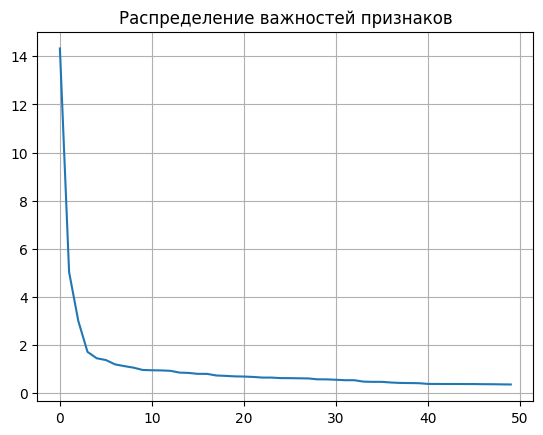

In [ ]:
plt.plot(list(range(0, 50)), sorted(imps, reverse=True)[:50])
plt.grid()
plt.title('Распределение важностей признаков (отсортированные)')
plt.show()

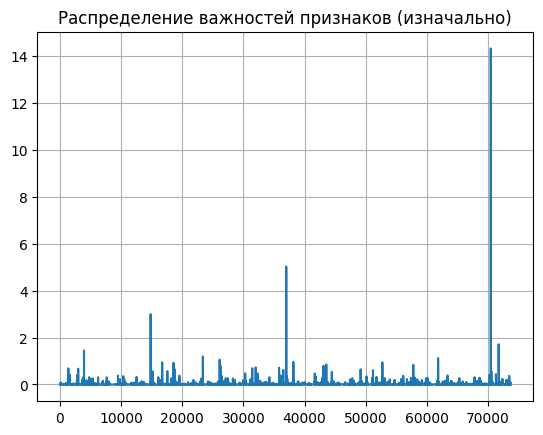

In [97]:
plt.plot(list(range(len(imps))), imps)
plt.grid()
plt.title('Распределение важностей признаков (изначально)')
plt.show()

In [116]:
len(imps)

73704

In [96]:
idx = np.argsort(imps)[::-1]

In [115]:
pd.DataFrame({'Importance': sorted(imps, reverse=True), 'idx': idx}, index=None).to_csv('Importances_sorted_(idx_sorted).csv')

In [104]:
idx

array([70427, 36998, 14831, ..., 48727, 48726,     0], dtype=int64)